In [261]:
import pandas as pd
import numpy as np

In [262]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sub_df = pd.read_csv("sample_submission.csv")

In [263]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [264]:
train_df['stroke'].unique()

array([0, 1])

In [265]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [266]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [267]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [268]:
train_df.duplicated().sum()

np.int64(0)

In [269]:
# Data Cleaning

sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [270]:
train_df['age'] = np.ceil(train_df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [271]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [272]:
train_df.drop(train_df[train_df['gender']=='Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index, inplace=True)

In [273]:
# Exploratory Data Analysis(EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style("darkgrid")

In [274]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

In [275]:
# Filter data for stroke & Non Stroke
no_stroke_data = train_df[train_df['stroke'] == 0 ]
stroke_data = train_df[train_df['stroke'] == 1 ]

In [276]:
# Univariate Analysis

stroke_count = train_df['stroke'].value_counts()

In [277]:
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [278]:
fig = px.pie(
    stroke_count, values=stroke_count.values, names=['No', 'Yes'], 
    title = 'Proportion of Stroke Cases', 
    color_discrete_sequence=plot_color)

fig.update_layout(legend_title_text = 'Stroke Status', title_x=0.3, title_y = 0.95)
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'label=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['No', 'Yes'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': {'bdata': 'Tzl4Ag==', 'dtype': 'i2'}}],
    'layout': {'legend': {'title': {'text': 'Stroke Status'}, 'tracegroupgap': 0},
               'piecolorway': [#008080, black],
               'template': '...',
               'title': {'text': 'Proportion of Stroke Cases', 'x': 0.3, 'y': 0.95}}
})

In [279]:
# Bivariate Analysis
def custom_historgram(columns:str, titles:list)->go.Figure:
    fig = sp.make_subplots(rows=1, cols=2, subplot_titles = ['No Stroke', 'Yes Stroke'])
    histogram_no_stroke = px.histogram(no_stroke_data, x = columns, color_discrete_sequence=['#008080'])
    histogram_stroke = px.histogram(stroke_data, x = columns, color_discrete_sequence=['black'])
    fig.add_trace(histogram_no_stroke['data'][0], row=1, col=1)
    fig.add_trace(histogram_stroke['data'][0], row=1, col=2)
    fig.update_layout(title = titles[0], title_x = 0.5)
    fig.update_xaxes(title_text = titles[1])
    fig.update_yaxes(title_text = 'Count')
    return fig

In [280]:
fig = custom_historgram('avg_glucose_level', ['Average Glucose Level Distribution by Stroke', 'Average Glucose Level'])
##fig.show()

In [281]:
fig = custom_historgram('age', ['Age Distribution by stroke', 'Age'])
##fig.show()

In [282]:
stroke_data['bmi'].mean()

np.float64(30.230696202531643)

In [283]:
no_stroke_data['bmi'].mean()

np.float64(28.02217163110899)

In [284]:
fig = px.violin(train_df, y = 'bmi', x='stroke', box=True, width=700, height=500, color_discrete_sequence=plot_color, 
                   title='BMI & Stroke Status', 
               labels={'stroke': 'Stroke Status', 'bmi': 'BMI'})
fig.update_layout(title_x = 0.3, title_y = 0.9)
#fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'box': {'visible': True},
              'hovertemplate': 'Stroke Status=%{x}<br>BMI=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#008080'},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'scalegroup': 'True',
              'showlegend': False,
              'type': 'violin',
              'x': {'bdata': ('AAAAAAAAAAAAAAAAAAAAAAAAAAAAAA' ... 'AAAAAAAAAAAAAAAAABAAAAAAAAAAAA'),
                    'dtype': 'i1'},
              'x0': ' ',
              'xaxis': 'x',
              'y': {'bdata': ('mpmZmZkZP0BmZmZmZuY3QGZmZmZmJk' ... 'MzMzMzOkAAAAAAAIA2QDMzMzMzszhA'),
                    'dtype': 'f8'},
              'y0': ' ',
              'yaxis': 'y'}],
    'layout': {'height': 500,
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'BMI & Stroke Status', 'x': 0.3, 'y': 0.9},
               'violinmode': 'group',
               'width': 700,
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Stroke Status'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'BMI'}}}
})

In [285]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

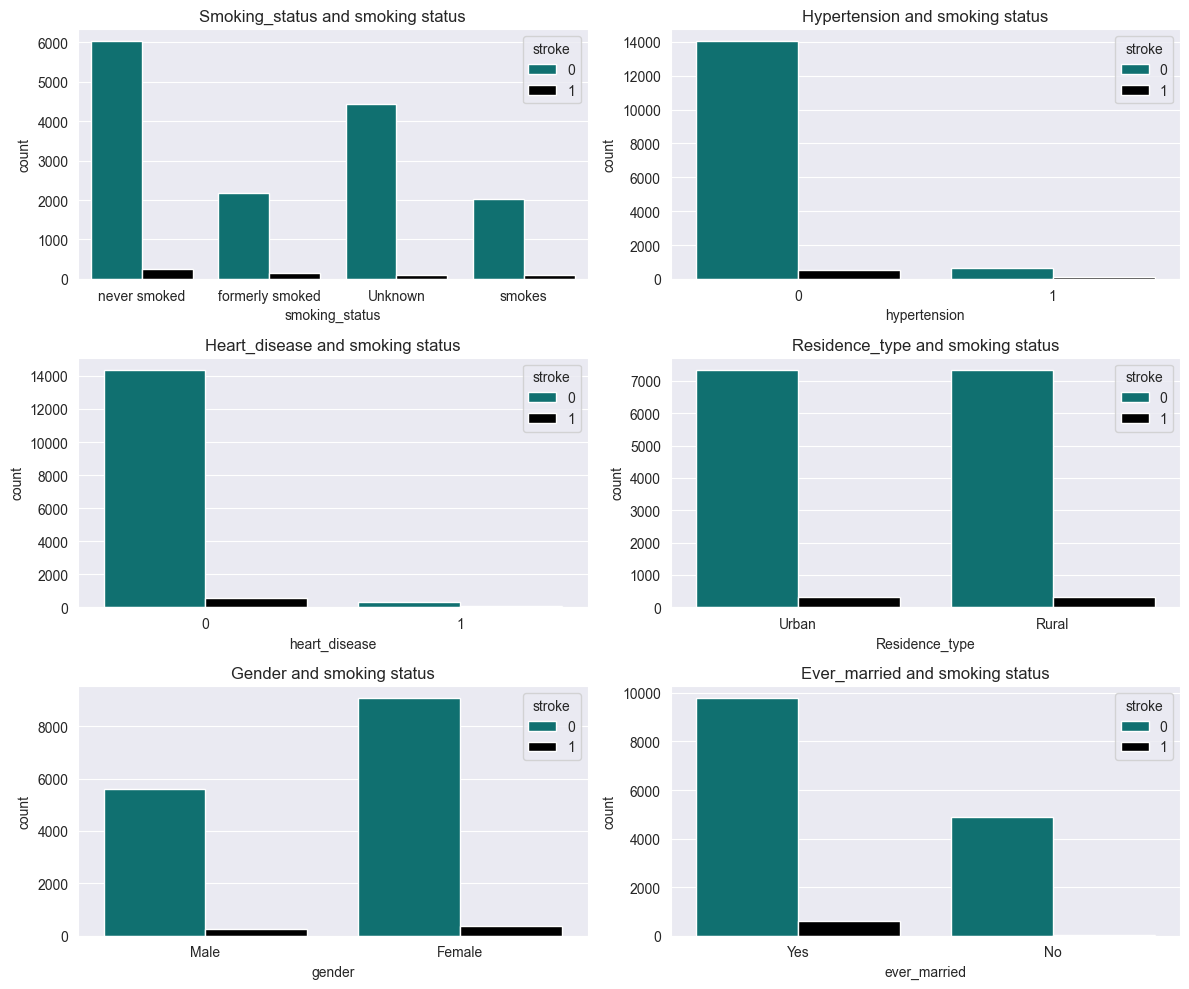

In [286]:
x_values = ['smoking_status', 'hypertension', 'heart_disease','Residence_type','gender', 'ever_married']
fig, axis = plt.subplots(nrows = 3, ncols = 2, figsize=(12, 10))

for ax, x_value in zip(axis.flat, x_values):
    sns.countplot(data = train_df, x = x_value, hue='stroke', ax = ax)
    ax.set_title(f'{x_value.capitalize()} and smoking status')

plt.tight_layout()
#plt.show()

In [287]:
# Data Preparation & Preprocessing
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display = 'diagram')

In [288]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [289]:
input_cols = list(train_df.columns)[1:-1]

In [290]:
target_col = 'stroke'

In [291]:
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [292]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()

In [293]:
numerical_cols = train_inputs.select_dtypes(include=np.number).columns.to_list()

In [294]:
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [295]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.to_list()

In [296]:
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [297]:
categorical_cols.remove('smoking_status')

In [298]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [299]:
ordinal_enc = OrdinalEncoder(categories=[['Unknown','never smoked', 'formerly smoked','smokes']])

In [300]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [301]:
preprocessor = ColumnTransformer([
    ('Ordinal_Encode', ordinal_enc,['smoking_status']), 
    ('OneHot_Encode', onehot_enc,categorical_cols)
]
)

In [302]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('Ordinal_Encode',
                                 OrdinalEncoder(categories=[['Unknown',
                                                             'never smoked',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('OneHot_Encode',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [303]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [304]:
encoded_cols

['Ordinal_Encode__smoking_status',
 'OneHot_Encode__gender_Female',
 'OneHot_Encode__gender_Male',
 'OneHot_Encode__ever_married_No',
 'OneHot_Encode__ever_married_Yes',
 'OneHot_Encode__work_type_Govt_job',
 'OneHot_Encode__work_type_Never_worked',
 'OneHot_Encode__work_type_Private',
 'OneHot_Encode__work_type_Self-employed',
 'OneHot_Encode__work_type_children',
 'OneHot_Encode__Residence_type_Rural',
 'OneHot_Encode__Residence_type_Urban']

In [305]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [306]:
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numerical_cols + encoded_cols]

In [307]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,Ordinal_Encode__smoking_status,OneHot_Encode__gender_Female,OneHot_Encode__gender_Male,OneHot_Encode__ever_married_No,OneHot_Encode__ever_married_Yes,OneHot_Encode__work_type_Govt_job,OneHot_Encode__work_type_Never_worked,OneHot_Encode__work_type_Private,OneHot_Encode__work_type_Self-employed,OneHot_Encode__work_type_children,OneHot_Encode__Residence_type_Rural,OneHot_Encode__Residence_type_Urban
0,28.0,0,0,79.53,31.1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [308]:
X_train.shape[1] == X_test.shape[1]

True

In [309]:
# Split Dataset into training and validation set
from sklearn.model_selection import train_test_split

In [310]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [311]:
X_train.shape

(12242, 17)

In [312]:
# Baseline Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [313]:
models = [
    (LogisticRegression(), 'LogisticRegression'), 
    (RandomForestClassifier(), 'RandomForestClassifier'), 
    (XGBClassifier(), 'XGBClassifier'), 
    (LGBMClassifier(verbose = 1), 'LightGBM')
]

In [314]:
def evalue_model(model, X_train, y_train, X_val, y_val):
    y_pred = model.predict(X_val)
    confusion_mat = confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return confusion_mat, accuracy, precision, recall, f1

In [315]:
confusion_mats = {}
def metric_df(model, model_name):
    confusion_mat, *df = evalue_model(model, X_train, y_train, X_val, y_val)
    confusion_mats[model_name] = confusion_mat
    df = [df]
    model_metrics = pd.DataFrame(data = df, columns=['Accuarcy','Precision', 'Recall', 'F1'])
    model_metrics.insert(0, 'Model', model_name)
    
    return model_metrics

In [316]:
predictions = []
for model, model_name in models:
    model.fit(X_train, y_train)
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

c:\Users\amank\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000374 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [317]:
predictions

[                Model  Accuarcy  Precision    Recall        F1
 0  LogisticRegression  0.955243   0.333333  0.022388  0.041958,
                     Model  Accuarcy  Precision    Recall        F1
 0  RandomForestClassifier  0.952957   0.272727  0.044776  0.076923,
            Model  Accuarcy  Precision    Recall        F1
 0  XGBClassifier  0.953283   0.363636  0.089552  0.143713,
       Model  Accuarcy  Precision    Recall        F1
 0  LightGBM   0.95459   0.380952  0.059701  0.103226]

In [318]:
oversample = SMOTE()
X_train_ns, y_train_ns = oversample.fit_resample(X_train, y_train)

In [319]:
X_train_ns.shape

(23488, 17)

In [320]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_ns, y_train_ns)
lr_with_smote_mat = metric_df(lr_with_smote, 'Logistic With SMOTE')
predictions.append(lr_with_smote_mat)

c:\Users\amank\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [321]:
for model_name , confusion_mat in confusion_mats.items():
    print(f'Confusion Matrix for {model_name}')
    print(confusion_mat)
    print()

Confusion Matrix for LogisticRegression
[[2921    6]
 [ 131    3]]

Confusion Matrix for RandomForestClassifier
[[2911   16]
 [ 128    6]]

Confusion Matrix for XGBClassifier
[[2906   21]
 [ 122   12]]

Confusion Matrix for LightGBM
[[2914   13]
 [ 126    8]]

Confusion Matrix for Logistic With SMOTE
[[2323  604]
 [  33  101]]



In [322]:
# Voting Classifer . Hard and Soft
from sklearn.ensemble import VotingClassifier

In [323]:
estimator = []
estimator.append(('LogisticRegression', LogisticRegression())), 
estimator.append(('RandomForestClassifier', RandomForestClassifier())), 
estimator.append(('XGBClassifier', XGBClassifier())), 
estimator.append(('LightGBM', LGBMClassifier(verbose = 1)))

In [324]:
VC_hard = VotingClassifier(estimators=estimator, voting='hard')
VC_hard.fit(X_train, y_train)
VC_hard_mat = metric_df(VC_hard, 'VC_HARD')
predictions.append(VC_hard_mat)

c:\Users\amank\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [325]:
VC_hard_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_HARD,0.955897,0.428571,0.022388,0.042553


In [326]:
VC_soft = VotingClassifier(estimators=estimator, voting='soft')
VC_soft.fit(X_train, y_train)
VC_soft_mat = metric_df(VC_soft, 'VC_soft')
predictions.append(VC_soft_mat)

c:\Users\amank\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [327]:
VC_soft_mat

,Model,Accuarcy,Precision,Recall,F1
0,VC_soft,0.956223,0.5,0.052239,0.094595


In [328]:
prediction_base = pd.concat(predictions, ignore_index=True, sort =False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis = 'index')

In [329]:
prediction_base

Model,Accuarcy,Precision,Recall,F1
Logistic With SMOTE,0.791898,0.143262,0.753731,0.240763
XGBClassifier,0.953283,0.363636,0.089552,0.143713
LightGBM,0.954590,0.380952,0.059701,0.103226
VC_soft,0.956223,0.500000,0.052239,0.094595
RandomForestClassifier,0.952957,0.272727,0.044776,0.076923
LogisticRegression,0.955243,0.333333,0.022388,0.041958
VC_HARD,0.955897,0.428571,0.022388,0.042553


In [330]:
models_to_plot = [
    'LogisticRegression', 
    'RandomForestClassifier', 
    'XGBClassifier', 
    'Logistic With SMOTE'
]

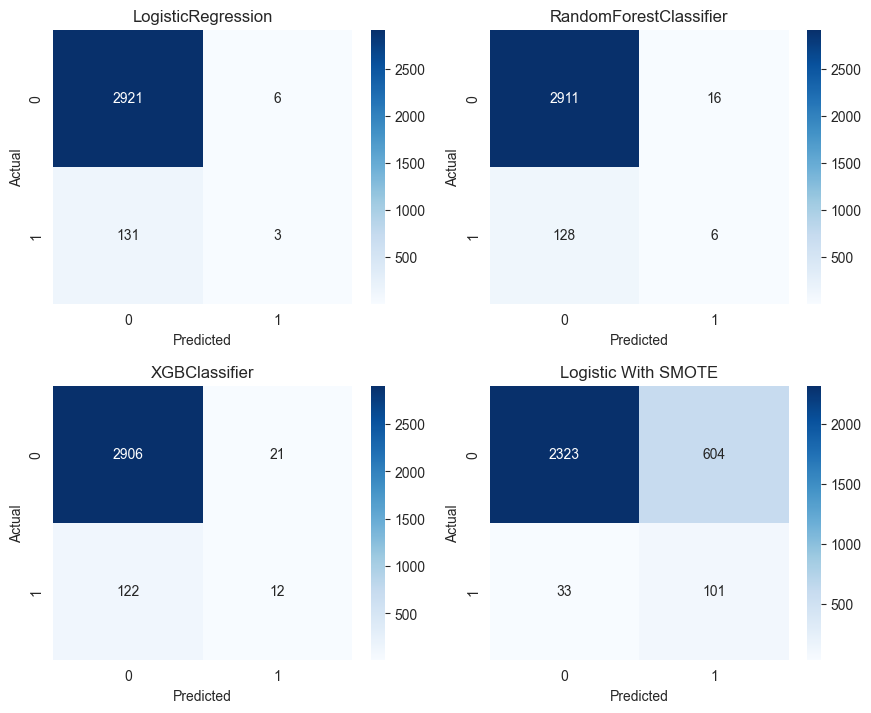

In [331]:
fig, axes = plt.subplots(nrows = 2, ncols =2, figsize = (9, 7))
for ax, model_name in zip(axes.ravel(), models_to_plot):
    confusion_mat = confusion_mats[model_name]
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap = 'Blues', ax = ax)
    ax.set_title(f'{model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.subplots_adjust(left=0, right = 0.9, top =0.9, bottom = 0)
##plt.show()

In [332]:
# AUC - ROC Curve Homework ->
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Precision - recall curve
from sklearn.metrics import PredictionErrorDisplay

In [333]:
# Retrain & Save Model
X_train = train_inputs[numerical_cols + encoded_cols]
y_train = train_df[target_col]

In [334]:
preds = lr_with_smote.predict(X_test)

In [335]:
preds

array([0, 0, 0, ..., 0, 0, 0], shape=(10203,))

In [336]:
sub_df = preds

In [337]:
pd.DataFrame(sub_df).to_csv("submission.csv", index=None)

In [338]:
sub_df = pd.read_csv("submission.csv")

In [339]:
sub_df.head()

,0
0,0
1,0
2,0
3,1
4,0


In [340]:
# Make Prediction on a single input

sub_df['stroke'] = preds

In [341]:
sub_df

,0,stroke
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [342]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [343]:
single_input = {
    'gender': 'Male', 
    'age': 33, 
    'hypertension':0,
    'heart_disease': 0, 
    'ever_married':'Yes',
    'work_type':'Private',
    'Residence_type':'Urban',
    'avg_glucose_level':79.53,
    'bmi': 31.10,
    'smoking_status': 'formerly smoked'
}

In [344]:
input_df = pd.DataFrame([single_input])

In [345]:
input_df[encoded_cols] = preprocessor.transform(input_df)

In [346]:
X = input_df[numerical_cols + encoded_cols]

In [347]:
lr_with_smote.predict(X)

array([0])

In [348]:
import joblib

In [349]:
model = {
    'encoded_cols': encoded_cols, 
    'numeric_cols':numerical_cols, 
    'preprocessor': preprocessor, 
    'model': lr_with_smote
}

In [350]:
joblib.dump(model, 'model.joblib')

['model.joblib']